# ***MINI PROJECT                                                                                                        ***
# Project Description
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.
We will handle this problem in a structured way. We will be following the table of content given below.

1).Problem Statement

2).Hypothesis Generation

3).Loading Packages and Data

4).Data Structure and Content

5).Exploratory Data Analysis

6).Univariate Analysis

7).Bivariate Analysis

8).Missing Value Treatment

9).Feature Engineering

10).Encoding Categorical Variables

11).Label Encoding

12).One Hot Encoding

13).PreProcessing Data

14).Modeling

15).Linear Regression

16).Regularized Linear Regression

17).RandomForest

18).XGBoost

19).Summary







# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Hypothesis Generation

## Some theories based on the problem statement are listed below.

1.Urban stores have more sales.

2.Weekends see a spike in sales.

3.Morning and late-night sales are higher.

4.Branded products have higher sales.

5.During the year's end, sales increased.

6.Sales are influenced by a store's size.

7.The store's location has an impact on its sales.

8.More shelf space means better sales for the items.

9.Better the advertising more is the sales.

10.Products with more offers and discounts have better sales.

11.Densely populated area stores have better sales.

# Loading Packages and Data

## The details of each column is given below

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : % of total display area in store allocated to this product

Item_Type : Category to which product belongs

Item_MRP : Maximum Retail Price (list price) of product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : Year in which store was established

Outlet_Size : Size of the store

Outlet_Location_Type : Type of city in which store is located

Outlet_Type : Grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of product in particular store. This is the outcome 
variable to be predicted.

In [ ]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test.shape

(5681, 11)

In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# Data Structure and Content

In [ ]:
train['source']='train'
test['source']='test'
df = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, df.shape)
print(df.head())

(8523, 13) (5681, 12) (14204, 13)
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1

# Exploratory Data Analysis

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [ ]:
#Filter categorical variables
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

# Univariate Analysis

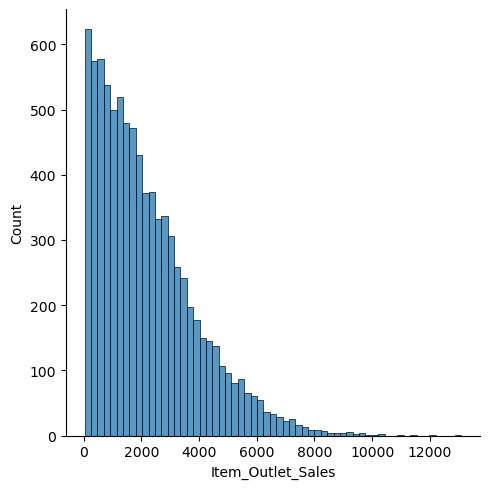

In [ ]:
sns.displot(df['Item_Outlet_Sales'])

<Axes: >

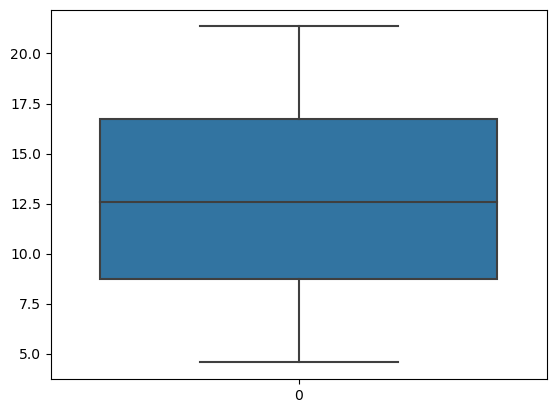

In [ ]:
sns.boxplot(df['Item_Weight'])

<Axes: xlabel='Outlet_Size', ylabel='count'>

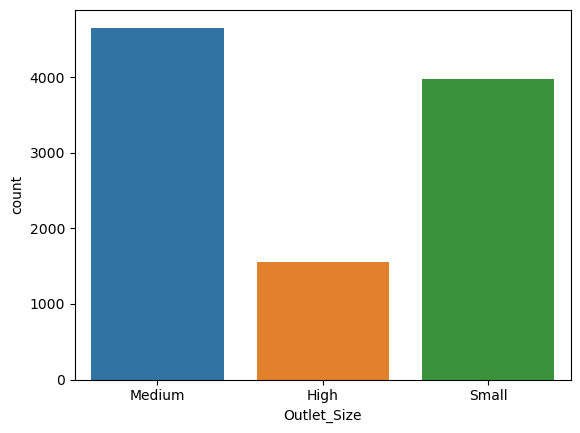

In [ ]:
sns.countplot(x='Outlet_Size',data=df)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

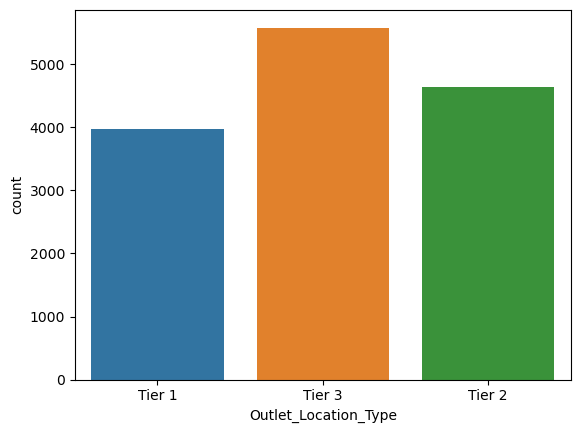

In [ ]:
sns.countplot(x='Outlet_Location_Type',data=df)

<Axes: xlabel='Outlet_Type', ylabel='count'>

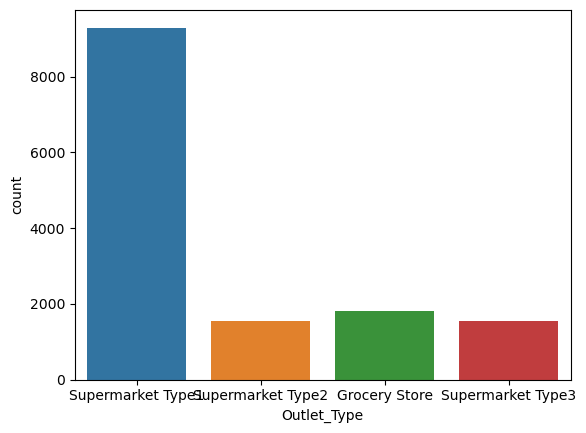

In [ ]:
sns.countplot(x='Outlet_Type',data=df)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

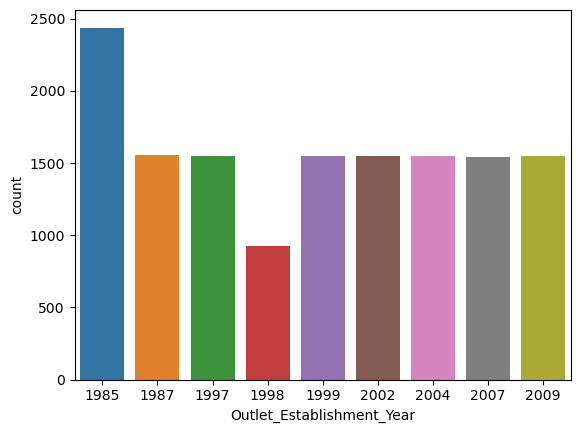

In [ ]:
sns.countplot(x='Outlet_Establishment_Year',data= df)

We can see that the Outlet_sales is normally distributed with right skewness.Most of the items have weight in range of 8-16. The mode of weight is near to 13. Medium sized outlets are more in number. Also Tier 3 outlets are more common. Type 1 supermarket is the most common. Most of the outlets establishment is equally distributed.

# Bivariate Analysis

In [ ]:
df.corr()

C:\Users\Semi\AppData\Local\Temp\ipykernel_8572\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

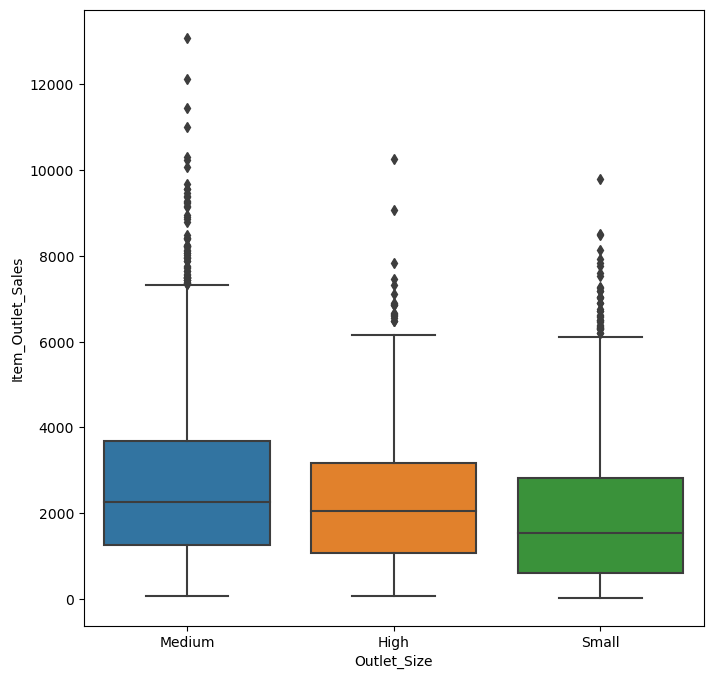

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

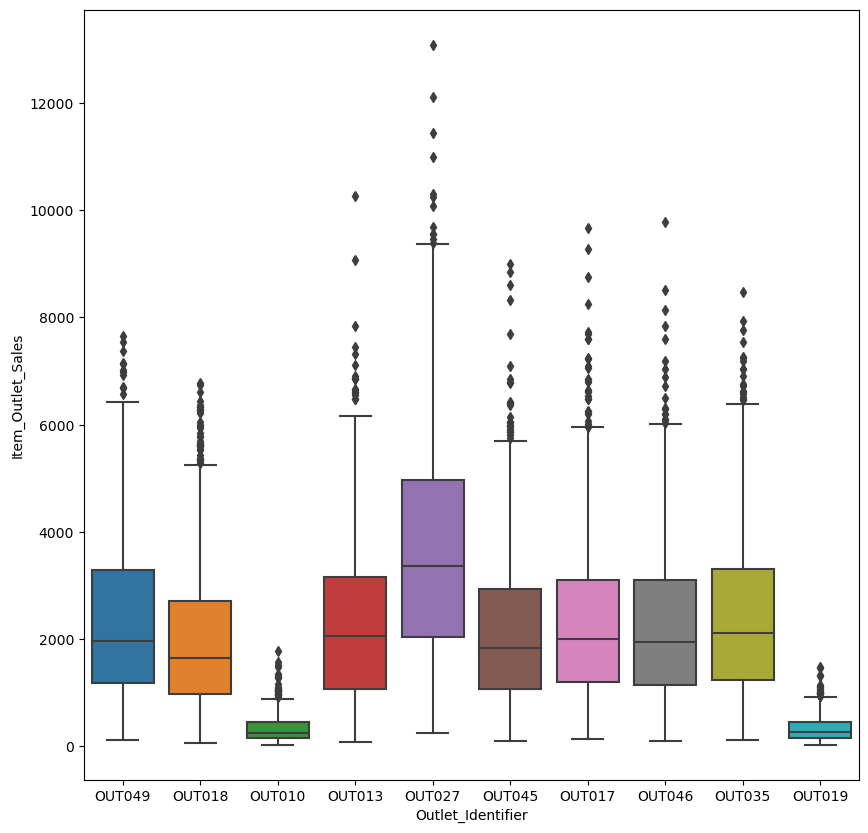

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

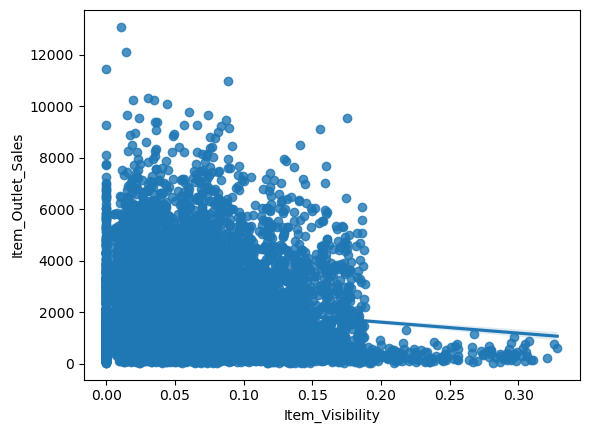

In [ ]:
sns.regplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

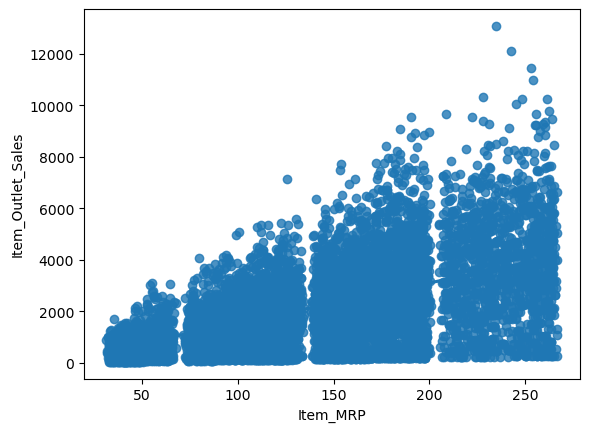

In [ ]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)


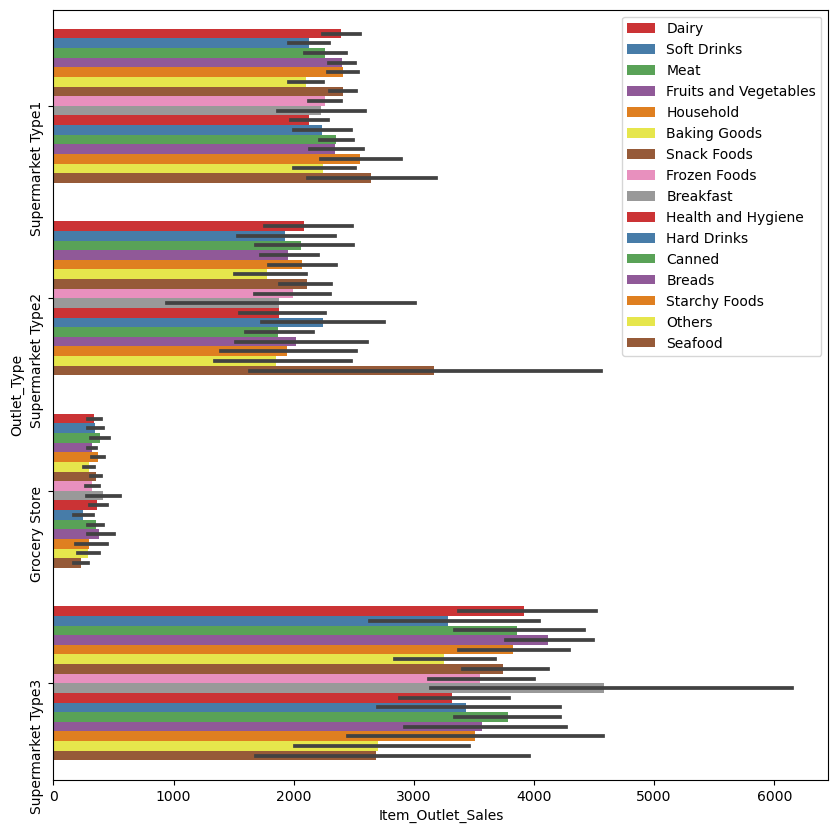

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.yticks(rotation=90)
plt.legend()

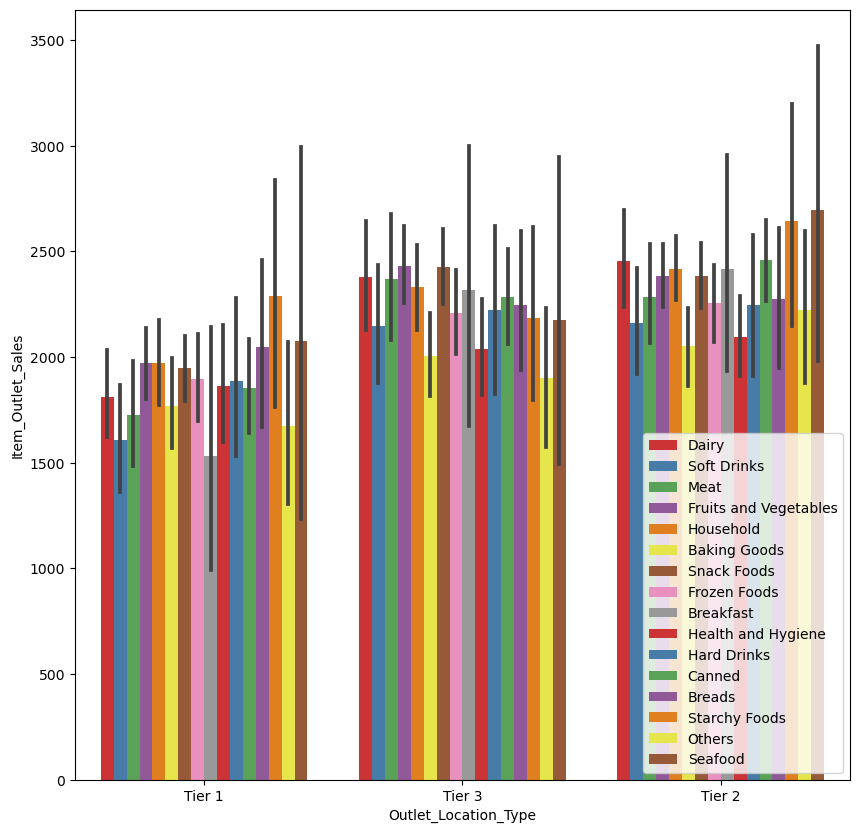

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Item_Type',palette='Set1')
plt.legend()

Outlet 27 has most sales. Medium outlets have larger sales. We can also note that maximum sales occurs at the visibility between 0- 0.19 , so there is a correlation between them.The string of points at Item_Visibility = 0.0 in the Item_Outlet_Sales table seems odd because item visibility cannot be entirely zero. This is something we'll keep in mind and take care of later.

We can plainly identify four pricing segments in the plot of item_MRP vs item_outlet_sales. We can day that the outlet location have impact on sales. Supermarket of type 3 has more sales.

# Missing Value Treatment

The target variable, Item_Outlet_Sales, has missing values that are ones from the test set. Therefore, we need not be concerned. In the data cleaning stage, however, we'll impute the missing values for Item_Weight and Outlet_Size.

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
# fill missing value with mean
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())


In [ ]:
#find mode of oulet size
m=df['Outlet_Size'].mode()
m

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
#fill missing value with mode
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

# Feature Engineering

In [ ]:
# we have seen that the categories in fat is not correct and we will change them
print (df['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (df['Item_Fat_Content'].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [ ]:
#we saw minimum visibility value is 0, which makes no practical sense and so we consider it  as missing values
print ('Number of 0 values initially: %d'%(df['Item_Visibility']==0).sum())
df['Item_Visibility']= df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())
print('Number of 0 values finally: %d'%(df['Item_Visibility']==0).sum())

Number of 0 values initially: 879
Number of 0 values finally: 0


In [ ]:
#Get the first two characters of ID:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

Non consumable items cannot be low fat or high fat, so we need to change them to another catagory as Non - Edible.

In [ ]:
#Mark non-consumables as separate category
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Encoding Categorical Variables and Label Encoding

In [ ]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])


# One Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'],dtype=float)

df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0           float64
Item_Fat_Content_1           float64
Item_Fat_Content_2           float64
Outlet_Location_Type_0       float64
Outlet_Location_Type_1       float64
Outlet_Location_Type_2       float64
Outlet_Size_0                float64
Outlet_Size_1                float64
Outlet_Size_2                float64
Outlet_Type_0                float64
Outlet_Type_1                float64
Outlet_Type_2                float64
Outlet_Type_3                float64
Item_Type_Combined_0         float64
Item_Type_Combined_1         float64
Item_Type_Combined_2         float64
Outlet_0                     float64
Outlet_1                     float64
O

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,FDX07,19.20,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.93,0.065953,Household,53.8614,OUT013,1987,994.7052,train,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# PreProcessing Data

In [ ]:
#Drop the columns which have been converted to different types:
df.drop(['Item_Type','Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)



C:\Users\Semi\AppData\Local\Temp\ipykernel_8572\2781524037.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source'],axis=1,inplace=True)
C:\Users\Semi\AppData\Local\Temp\ipykernel_8572\2781524037.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


# Modelling

In [ ]:

from sklearn.model_selection import train_test_split

# Train and Test split
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
#fit
lr.fit(X_train,y_train)

# Predict
predicted = lr.predict(X_test)

# Score Metrics for Regression:

print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lr.score(X_test,y_test))

MEAN SQUARED ERROR(MSE) 1297136.678683481
MEAN ABSOLUTE ERROR(MAE) 835.4420547161519
ROOT MEAN SQUARED ERROR(RMSE) 1138.9190834661965
SCORE 0.5750033904934494


# Regularized Linear Regression

In [ ]:

# Lasso linear regression
from sklearn.linear_model import Lasso ,Ridge
lasso = Lasso(alpha=0.05)

# Fit
lasso.fit(X_train, y_train)

# Predict
predicted = lasso.predict(X_test)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",lasso.score(X_test,y_test))


MEAN SQUARED ERROR(MSE) 1297063.8814691973
MEAN ABSOLUTE ERROR(MAE) 835.4001316224522
ROOT MEAN SQUARED ERROR(RMSE) 1138.887124112481
SCORE 0.5750272419269649


In [ ]:
# Ridge linear regression
from sklearn.linear_model import Lasso ,Ridge
Ridge = Ridge(alpha=0.05)

# Fit
Ridge.fit(X_train, y_train)

# Predict
predicted = Ridge.predict(X_test)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",Ridge.score(X_test,y_test))

MEAN SQUARED ERROR(MSE) 1297133.332182449
MEAN ABSOLUTE ERROR(MAE) 835.4396143866638
ROOT MEAN SQUARED ERROR(RMSE) 1138.9176143086247
SCORE 0.5750044869481373


In [ ]:
from sklearn.tree import DecisionTreeRegressor
des = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

# Fit
des.fit(X_train, y_train)

# Predict
predicted = des.predict(X_test)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",des.score(X_test,y_test))

MEAN SQUARED ERROR(MSE) 1217929.3413547273
MEAN ABSOLUTE ERROR(MAE) 768.678602163527
ROOT MEAN SQUARED ERROR(RMSE) 1103.5983605255706
SCORE 0.600955050303831


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()

#fit
rfg.fit(X_train,y_train)

# Predict
predicted = rfg.predict(X_test)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",rfg.score(X_test,y_test))

MEAN SQUARED ERROR(MSE) 1340982.014775637
MEAN ABSOLUTE ERROR(MAE) 802.8767471530791
ROOT MEAN SQUARED ERROR(RMSE) 1158.0077783744102
SCORE 0.5606378116858606


# XGBoost

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

#fit
xgb.fit(X_train,y_train)

# Predict
predicted =xgb.predict(X_test)

# Score Metrics for Regression:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_test,predicted))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_test,predicted))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_test,predicted)))
print("SCORE",xgb.score(X_test,y_test))

MEAN SQUARED ERROR(MSE) 1406240.0893903135
MEAN ABSOLUTE ERROR(MAE) 818.0348983072199
ROOT MEAN SQUARED ERROR(RMSE) 1185.8499438758317
SCORE 0.5392565178639082


# Summary

Comparing all Models and finding the best one.

In [ ]:
print("Linear Regression score",lr.score(X_test,y_test))
print("Lasso linear regression score",lasso.score(X_test,y_test))
print("Ridge linear regression score",Ridge.score(X_test,y_test))
print("Decision Tree Regresson score",des.score(X_test,y_test))
print("Random Forest Regresson score",rfg.score(X_test,y_test))
print("XGBoost score",xgb.score(X_test,y_test))

Linear Regression score 0.5750033904934494
Lasso linear regression score 0.5750272419269649
Ridge linear regression score 0.5750044869481373
Decision Tree Regresson score 0.600955050303831
Random Forest Regresson score 0.5606378116858606
XGBoost score 0.5392565178639082


We can see that Decision Tree Regression Regression model gave us the best score for our testing data. Therefore it is best from all the above models.

We researched the dataset Big Mart Sales Analysis and clarified the significance of each column. Then we explored our dataset using exploratory data analysis. To explore the link between different features, we created a number of Univariate and Bi-variate graphs. Then, we performed feature engineering and cleaned up our data.
In order to forecast values for Outlet_sales, we trained our model. The best model was determined through evaluation.
